In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:\\Users\\meghna\\Desktop\\My_Project\\Titanic Survival Prediction\\train.csv')
test_data = pd.read_csv('C:\\Users\\meghna\\Desktop\\My_Project\\Titanic Survival Prediction\\test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Above stats show that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. Also, we can already detect some features, that contain missing values, like the ‘Age’ feature.

### Visualize and Handling Missing Values

In [8]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#percentage of null values in each column
print((train_data.isnull().sum()/891)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


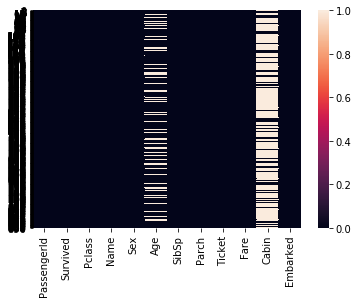

In [11]:
sns.heatmap(train_data.isnull(),yticklabels=True)

#### As we can see in above heatmap shows Age has some white bars shows that their are approx 20% missing values and Cabin has approx 77% null values which is huge number.

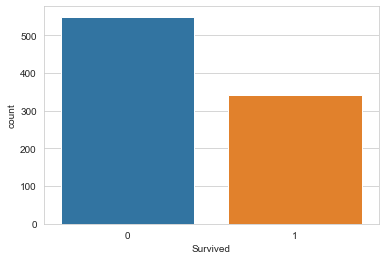

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

#### Above Diagram depicts that the approx 600 were not survived and approx 360 survived

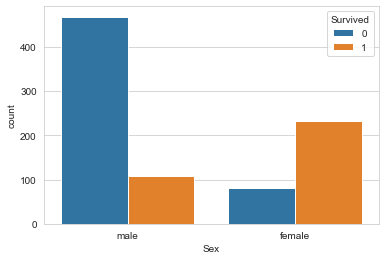

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=train_data)

#### Above diagram depicts that Male Passenger died much as compared to Female and Female Survived much as compared to Male Passenger

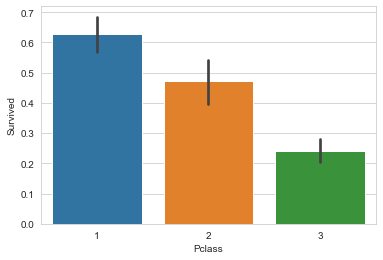

In [14]:
sns.set_style('whitegrid')
sns.barplot(x='Pclass', y='Survived', data=train_data)

#### Above diagram depicts that Passenger having class 3 died much and Passenger having class 1 survived larger than both class

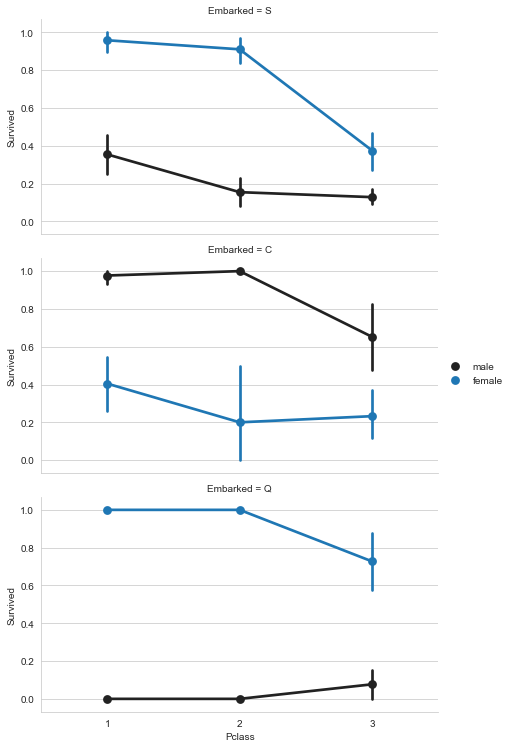

In [15]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=3.5, aspect=1.8)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

#### Embarked and Pclass both seem to be correlated with survival, depending on the gender. Women on port Q and on port S have a higher chance of survival. Men are more safe at port C and less safe at port Q and S.

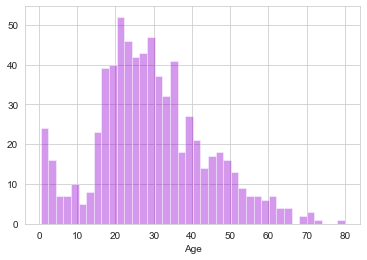

In [16]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkviolet',bins=40)

#### As we can see in above diagram, Age from 20 to 40 was there at titanic and less number of people are age between 70 to 80 

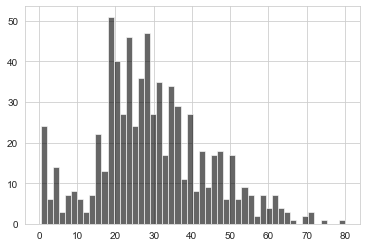

In [17]:
train_data['Age'].hist(bins=50,color='black',alpha=0.6)

#### Above histogram counts the number of occurences in age column

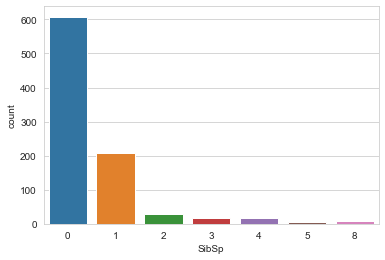

In [18]:
sns.countplot(x='SibSp',data=train_data)

#### As above diagram depicts, approx 600 having sibling or spouse is 0 and approx 200 have sibling or spouse is 1 as on...

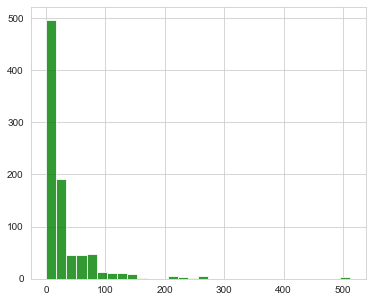

In [19]:
train_data['Fare'].hist(color='green',figsize=(6,5),bins=30,alpha=0.8)

#### Above diagram depicts that most of the passengers had tickets under $100

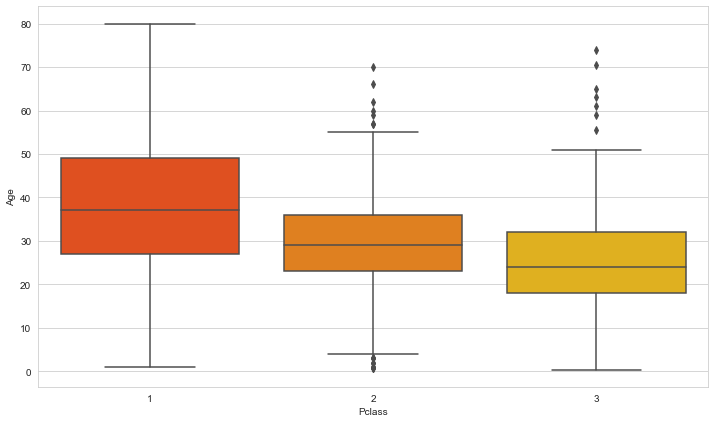

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',palette='autumn',data=train_data)

#### As above diagram depicts, Passenger class 1 having mean age is approx 36-37 and Passenger class 2 having mean age is around 28-29 and Passenger class 3 having mean age around 24-25

## Data Cleaning & Data Preprocessing

#### Deleting PassangerID fom training data(train_data) because it doesn't contribute to a person's survival probability but we'll still need it in our test_data.

In [21]:
train_data = train_data.drop(['PassengerId'], axis=1)

### Missing Data - 
#### From the above heatmap and stats, we can see that we have missing values in three features - Cabin(687), Age(177) & Embark(2)
### 1. Cabin

In [22]:
test_data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [23]:
#Below, we are creating a 'Deck' column and extracting the first letter of the cabin code(e.g., C of C85 OR C123) as the first letter denotes the passenger's deck
train_data['Deck'] = train_data['Cabin'].astype(str).str[0]
test_data['Deck'] = test_data['Cabin'].astype(str).str[0]

#Dropping the 'Cabin' column as now we have received our relevant information out of it.
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

#Replacing str values(letters) into int values(numbers) so that our model is suitable for ML modeling 
train_data.replace({'Deck' : {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "n" : 0}}, inplace=True)
test_data.replace({'Deck' : {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "n" : 0}}, inplace=True)

#'n' here has been extracted out of 'nan' values of cabin hence we replace all the nan by 0

In [24]:
train_data['Deck'].unique()

array([0, 3, 5, 7, 4, 1, 2, 6, 8], dtype=int64)

In [25]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0


In [26]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,0


### 2. Age

#### Imputation of Age

In [27]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

#### Now, the above function 'impute_age' is defined which will take age and PClass columns and perform mentioned operations, i.e., as we noticed earlier in our first heatmap that our dataset has a lot of null values in age column, that is why, here we are replacing the null values by the mean value in that particular PClass which we observed through our boxplot.

In [28]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

In [29]:
train_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

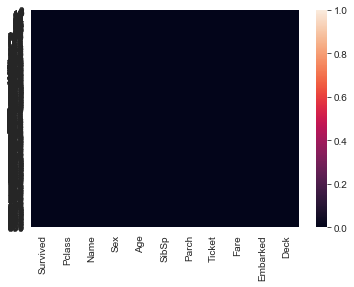

In [30]:
sns.heatmap(train_data.isnull(),yticklabels=True)

#### Now, we can see in the above heatmap that there is no null value in the 'age' column as it is being replaced by a mean value due to imputation based on pclass.

### 3. Embarked

In [31]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
common_val = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_val)

#### Here we'll be replacing the null values in the 'Embarked' column with the most common value 'S' which we can observe from the above information

In [33]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### No null values in our train dataset

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Deck         418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [36]:
test_data['Fare'].isnull().sum()

1

#### We can notice one null value in 'Fare' column so we'll replace it with the mean of fair

In [37]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

In [38]:
test_data['Fare'].isnull().sum()

0

In [39]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [40]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


#### Next we will be converting columns 'Age' and 'Fare' into round off integer values

In [41]:
train_data['Age'] = train_data['Age'].round(0).astype(int)
train_data['Fare'] = train_data['Fare'].round(0).astype(int)

In [42]:
test_data['Age'] = test_data['Age'].round(0).astype(int)
test_data['Fare'] = test_data['Fare'].round(0).astype(int)

In [43]:
train_data[['Age','Fare']].head()

,Age,Fare
0,22,7
1,38,71
2,26,8
3,35,53
4,35,8


In [44]:
test_data[['Age','Fare']].head()

,Age,Fare
0,34,8
1,47,7
2,62,10
3,27,9
4,22,12


In [45]:
train_sex = pd.get_dummies(train_data['Sex'],drop_first=True)
train_embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

test_sex = pd.get_dummies(test_data['Sex'],drop_first=True)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)

#### Next we will delete columns 'Name' and 'Ticket' as name doesn't affect the survival of a person and Ticket has 600+ unique values, hence we will drop these two columns

In [46]:
train_data = train_data.drop(['Name','Ticket','Sex','Embarked'], axis=1)
test_data = test_data.drop(['Name', 'Ticket','Sex','Embarked'], axis=1)

In [47]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck
0,0,3,22,1,0,7,0
1,1,1,38,1,0,71,3
2,1,3,26,0,0,8,0
3,1,1,35,1,0,53,3
4,0,3,35,0,0,8,0


In [48]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Deck
0,892,3,34,0,0,8,0
1,893,3,47,1,0,7,0
2,894,2,62,0,0,10,0
3,895,3,27,0,0,9,0
4,896,3,22,1,1,12,0


In [49]:
train_data = pd.concat([train_data,train_sex,train_embark],axis=1)

test_data = pd.concat([test_data,test_sex,test_embark],axis=1)

In [50]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,male,Q,S
0,0,3,22,1,0,7,0,1,0,1
1,1,1,38,1,0,71,3,0,0,0
2,1,3,26,0,0,8,0,0,0,1
3,1,1,35,1,0,53,3,0,0,1
4,0,3,35,0,0,8,0,1,0,1


In [51]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Deck,male,Q,S
0,892,3,34,0,0,8,0,1,1,0
1,893,3,47,1,0,7,0,0,0,1
2,894,2,62,0,0,10,0,1,1,0
3,895,3,27,0,0,9,0,1,0,1
4,896,3,22,1,1,12,0,0,0,1


In [52]:
train_data.dropna(inplace=True)
train_data.reset_index(drop=True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,male,Q,S
0,0,3,22,1,0,7,0,1,0,1
1,1,1,38,1,0,71,3,0,0,0
2,1,3,26,0,0,8,0,0,0,1
3,1,1,35,1,0,53,3,0,0,1
4,0,3,35,0,0,8,0,1,0,1


In [53]:
test_data.dropna(inplace=True)
test_data.reset_index(drop=True)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Deck,male,Q,S
0,892,3,34,0,0,8,0,1,1,0
1,893,3,47,1,0,7,0,0,0,1
2,894,2,62,0,0,10,0,1,1,0
3,895,3,27,0,0,9,0,1,0,1
4,896,3,22,1,1,12,0,0,0,1


## Building ML Models

##### Now we will train different Machine Learning models as our testing data doesn't have input labels hence we have to compare several ML models and choose the accurate one for our dataset.

In [54]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis=1).copy()

#### Linear Regression

In [55]:
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

lr.score(X_train, Y_train)
acc_lr = round(lr.score(X_train, Y_train) * 100, 2)

print(acc_lr,'%')

40.44 %


#### Stochastic Gradient Descent (SGD) -

In [56]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print(acc_sgd,'%')

69.14 %


#### Random Forest -

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print(acc_random_forest,'%')

97.31 %


#### Logistic Regression -

In [58]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print(acc_log,'%')

81.93 %


#### K Nearest Neighbor -

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn,'%')

83.84 %


#### Gaussian Naive Bayes -

In [60]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian,'%')

79.8 %


#### Perceptron -

In [61]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(acc_perceptron,'%')

69.02 %


#### Linear Support Vector Machine -

In [62]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

print(acc_linear_svc,'%')

81.03 %


#### Decision tree -

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

print(acc_decision_tree,'%')

97.31 %


## Choosing the best model

In [125]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_lr, acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data.head(9)

,Model
Score,
97.31,Random Forest
97.31,Decision Tree
83.84,KNN
81.93,Logistic Regression
81.03,Support Vector Machines
79.80,Naive Bayes
69.14,Stochastic Gradient Decent
69.02,Perceptron
40.44,Linear Regression


## K-Fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.79775281 0.7752809  0.83146067 0.86516854 0.82022472
 0.84269663 0.7752809  0.87640449 0.83146067]
Mean: 0.8204619225967541
Standard Deviation: 0.033852395100109886


#### Our data inaccuracy can range anywhere between +3.3 to -3.3

In [124]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[476,  73],
       [100, 242]], dtype=int64)

## Feature Importance

In [66]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
male,0.278
Age,0.264
Fare,0.183
Pclass,0.084
Deck,0.069
SibSp,0.052
Parch,0.036
S,0.024
Q,0.010


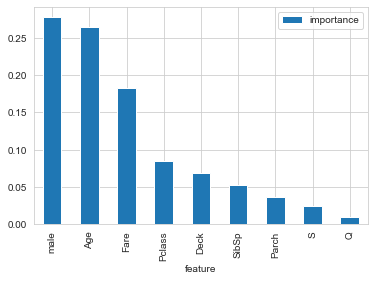

In [67]:
importances.plot.bar()

## Conclusion
##### Embark(Q & S) and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Embark and Parch.

In [68]:
train_data  = train_data.drop("S", axis=1)
train_data  = train_data.drop("Q", axis=1)
train_data  = train_data.drop("Parch", axis=1)

test_data  = test_data.drop("S", axis=1)
test_data  = test_data.drop("Q", axis=1)
test_data  = test_data.drop("Parch", axis=1)

### Training Random Forest Again

In [116]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_predict = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.31 %


#### Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features. 
#### There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [70]:
print("oob score:",round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.47999999999999 %


#### Now the above data is ready to tune

## Hyperparameter Tuning

In [71]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
#### The above operations on the cell takes about 1-2 hr to run on a normal pc so be patient.

### Test New Parameters

In [121]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)


random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.81 %


## Further Evaluation

### Confusion Matrix

In [123]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[476,  73],
       [100, 242]], dtype=int64)

#### The above confusion matrix shows that we get 476 survived cases correctly and 73 survived cases incorrectly predicted. Also, 100 unsurvived cases incorrectly predicted and 242 unsurvived cases correctly predicted in the training dataset. 

In [115]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Precision and Recall

In [74]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7682539682539683
Recall: 0.7076023391812866


### F score

In [75]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7366818873668189

### Precision Recall Curve

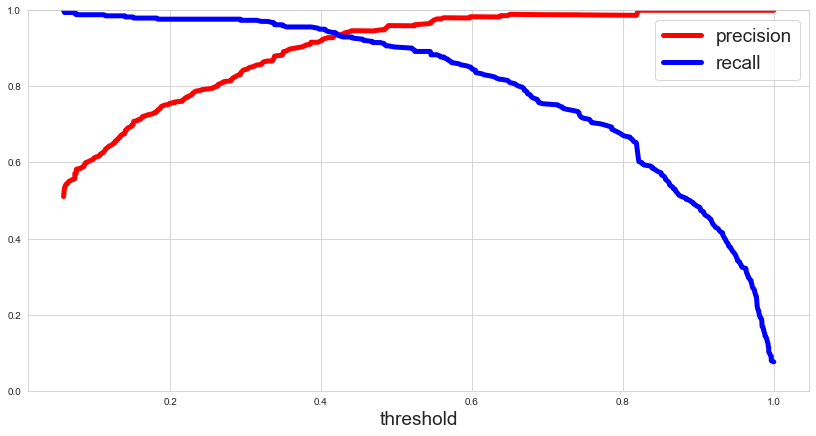

In [76]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

### ROC AUC Curve

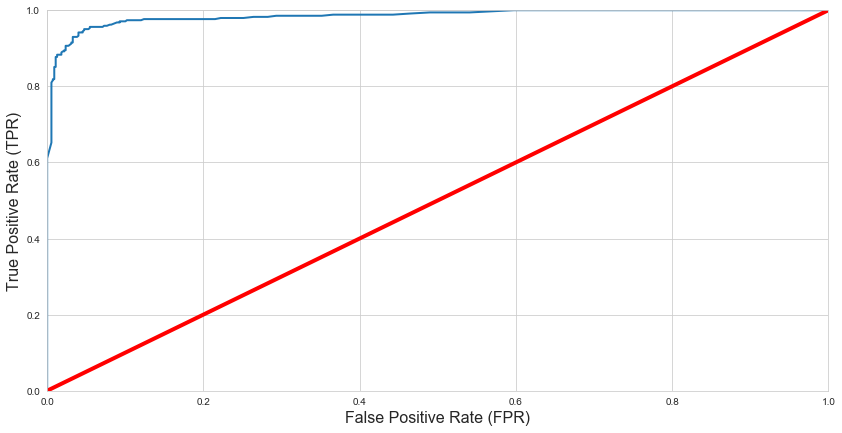

In [77]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### ROC AUC Score

In [78]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score: ",r_a_score*100,"%")

ROC-AUC-Score:  98.468241033671 %


## Predicted Dataframe

In [79]:
print(Y_prediction)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [80]:
test_Passenger_ID = test_data['PassengerId']
Y_P = sr = pd.Series(Y_prediction)
Predicted_data = pd.concat([test_Passenger_ID,Y_P],axis=1)

In [81]:
Predicted_data.head(20)

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


#### Predicted data is saved in 'Predicted_dataset'